In [1]:
import psycopg2
import numpy as np
import pandas as pd
import datetime as dt
import cx_Oracle
import csv
from matplotlib import pyplot as plt 
import seaborn as sns                
from time import strptime            
%matplotlib inline                   

In [2]:
#Load the data 
df_csv = pd.read_csv('reviews_merge_all.csv')#, encoding='latin-1', sep='|', header=None)

In [3]:
df_csv.head()

,EXPERIENCE_ID,EMPRESA,DATE_REVIEW,SCORE,TITLE,DESCRIPTION,MONTH_ID
0,2201810140,Codere,2019-06-25,3,Estabilidad,Como negativo la dificultad para crecer tanto ...,2019-06
1,1803055084,Robert Bosch GmbH,2019-01-22,5,Muy buena calidad de trabajo,Mi experiencia muy buena en todoa los sentidos.,2019-01
2,1273727536,Bijou Brigitte,2019-05-29,1,No quieren trabajadores quieren esclavos....no...,Los mandos intermedios no tienen ningun tipo d...,2019-05
3,9574589990,Vinsa,2019-07-23,4,/,/,2019-07
4,9195149082,Barcelona Activa,2019-05-13,5,Excelencia en formacion a emprendedores.,Excelencia en formacion a emprendedores.,2019-05


In [4]:
reviews_retail = df_csv

## Cantidad de Reviews por Empresa

In [5]:
# Create dataframe with review counts by retail company
countbyfirm = reviews_retail.EMPRESA.value_counts()
company = countbyfirm.index
count = countbyfirm.values
company = list(company)
count = list(count)
countbyfirm_df = pd.DataFrame( {'EMPRESA': company, 'Count': count})

In [ ]:
# Plot bar graph of review counts by retail company
plt.figure(figsize=(5,5))
reviewcounts_firm = sns.barplot(countbyfirm_df.Count, countbyfirm_df.EMPRESA, color="blue", saturation=0.1)
reviewcounts_firm.set(xlabel='Count of Reviews', ylabel='EM Company')
plt.tight_layout()
#plt.savefig('fig100.png', format='png', dpi=300)

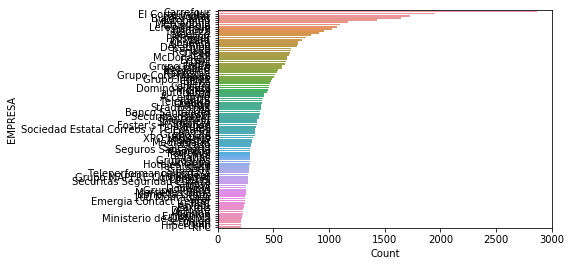

In [11]:
df=countbyfirm_df.head(1)

#groupedvalues=df.groupby(['EMPRESA']).count().reset_index()
g=sns.barplot(x='Count',y='EMPRESA',data=df)

In [6]:
countbyfirm_df

,EMPRESA,Count
0,Carrefour,2864
1,El Corte Ingles,1949
2,particular,1731
3,Burger King,1646
4,autonomo,1427
5,Mercadona,1170
6,Cruz Roja,1101
7,Leroy Merlin,1068
8,Primark,1031
9,Telepizza,954
